# Linear regression

Linear regression is one the simplest yet most powerful machine learning algorithm that ever exists. It is the building blocks for other more advanced algorithms like SVM. The common misconception about linear regression is that it needs to be linear or a straight line. Yet that is incorrect as linear regression can be used to solve non-linear problems too. The 'linear' characteristic here indicates the addiction or weighted sum of the input features. We can engineered the features like applying polynomial transformation to handle a curve and the features serve as constant. 

As all machine learning algorithm, we start with the definition of the problem.
Vectorized form
y_pred = theta.T * x

Refer to https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d
A good article that explains vectorization

Next we need an objective or cost function.
We will use MSE for linear regression. Our goal is to min MSE.
MSE is a convex and differentiable equation.

So the question now is how do we learn theta? Which theta will produce the optimal fit?

One of the solution is via the closed-form solution or the mathematical equation that gives the result directly.
The minima exists for MSE because it is convex. We can get a neat equation that can solves the problem directly.
(refer to the link below)
https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/

In [3]:
#Normal equation
import numpy as np

#definining x, 100 lines, single column
#Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
x = 3*np.random.rand(100,1)

#This is our solution, 5 is the intercept and 4 is the slope or gradient aka weighted feature
#randn will return random samples from a normal distribution, in this example, it represents noise of the data
y = 5 + 4*x+np.random.randn(100,1)

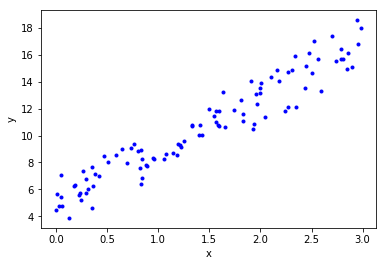

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')

In [10]:
#Compute theta with Normal equation

#Translates slice objects to concatenation along the second axis.
x_b = np.c_[np.ones((100,1)),x] #add x0 = 1 to every row or each instance, intend to learn intercept and gradient in one go
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta

array([[ 5.04430337],
       [ 3.9234364 ]])

So we learn that the intercept is 5.04 and gradient is 3.92. Close enough. Below demo the c_ function.

In [12]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [13]:
np.c_[np.array([1,2,3]), np.ones((3,1))]

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.]])

In [24]:
#Let's make some prediction with the theta that we derived

x_new = np.array([0,3])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_pred = x_new_b.dot(theta)
y_pred

array([[  5.04430337],
       [ 16.81461257]])

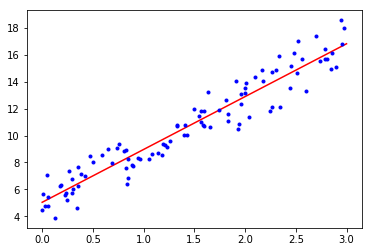

In [25]:
plt.plot(x_new, y_pred, 'r')
plt.plot(x,y, 'b.')

In [28]:
#Quite tedious but we can do this in sklearn too
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
lin_reg.intercept_, lin_reg.coef_

(array([ 5.04430337]), array([[ 3.9234364]]))

In [31]:
lin_reg.predict(x_new.reshape(-1,1))

array([[  5.04430337],
       [ 16.81461257]])

Similar to the normal equation solution above.
However, normal equation involves inverse of X.T. It is computational expensive and complicated to invert a large matrix. 
Normal equation gets slow when number of features grow very large (>10,000).

Another point to note, for linear regression after we train the model we only need to keep the intercept and coefficients. Training data are not needed anymore. This is a clear distinction between parametric and non parametric models. We will talk more about that in the coming weeks.

Let's try gradient descent. It is a generic optimization algorithm that works by tweaking parameters iteratively to min a cost function.
https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html
https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e
